In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# parameters
ns = [128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768, 65536]
blockSizeBubbleSorts = [128, 256, 512, 1024]
blockSizeDotProds = [128, 256, 512, 1024]

In [4]:
# CPU data
cpu_data = np.zeros((3, 10))
for i in range(1,3+1):
    cpu_data[i-1,:] = np.genfromtxt(f"../data/{i}.txt")[:,1]

In [5]:
# CUDA data
cuda_data = np.zeros((3,4,4,10))
for i in range(1,3+1):
    for j in range(4):
        for k in range(4):
            cuda_data[i-1,j,k] = np.genfromtxt(f"../data/{i}.{blockSizeBubbleSorts[j]}.{blockSizeDotProds[k]}.txt")[:,1]

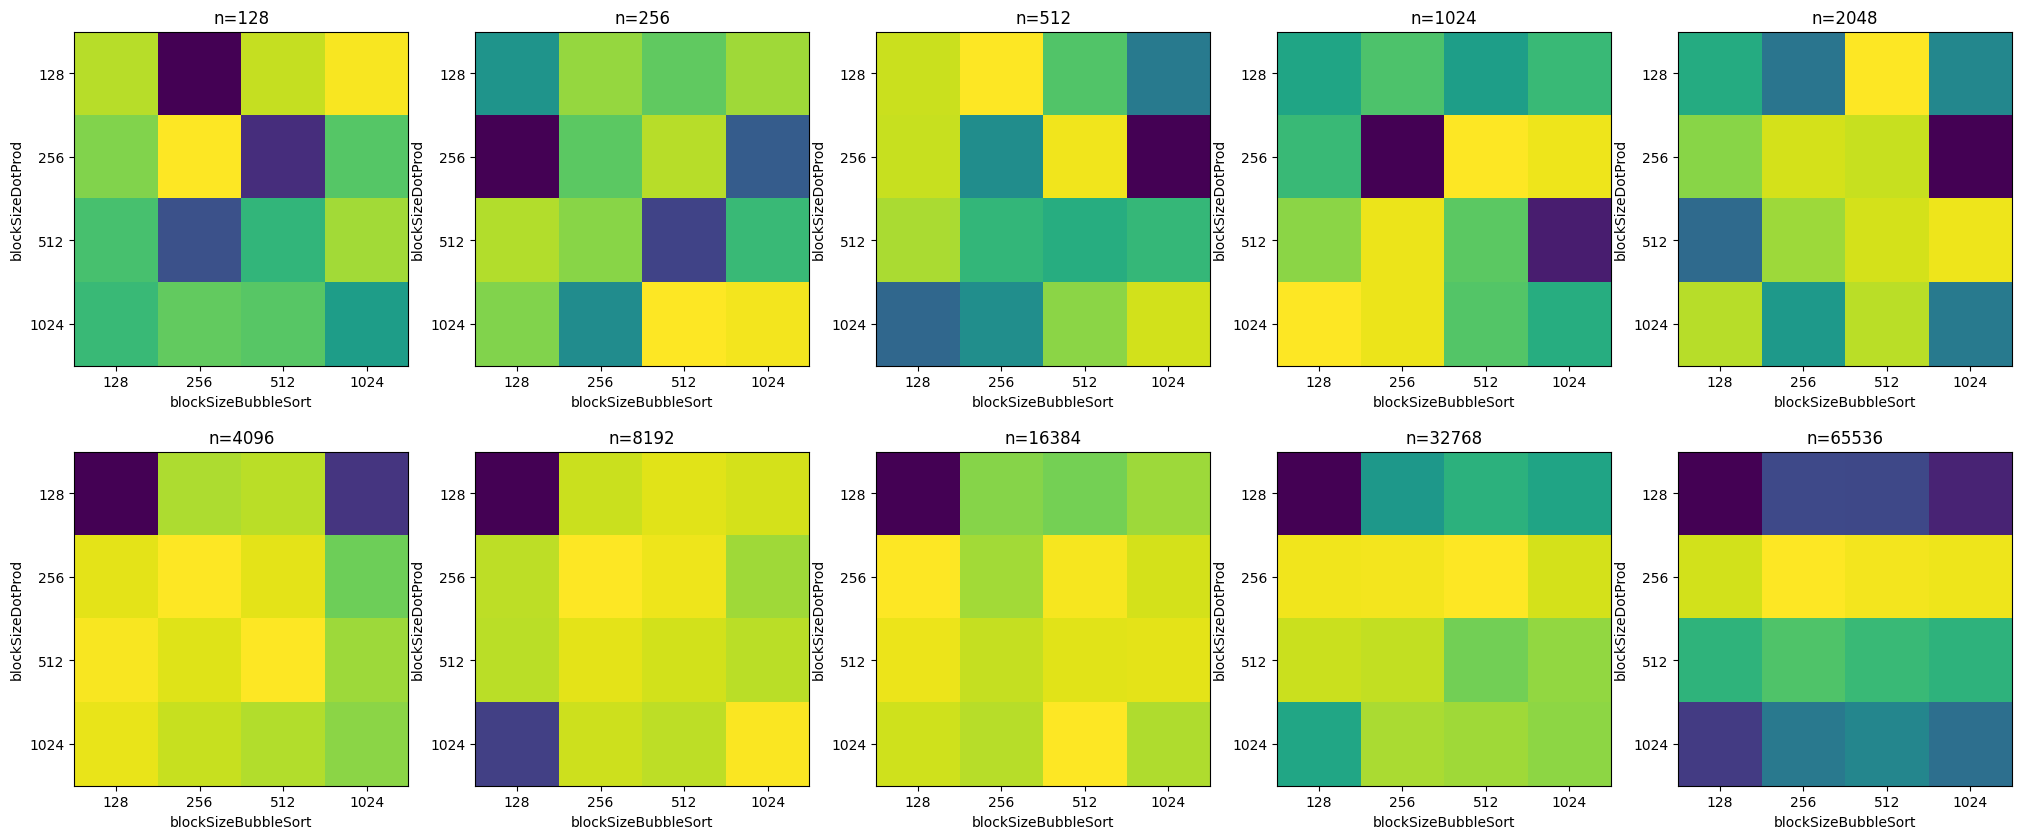

In [5]:
fig = plt.figure(figsize=(25,10))
avg_cuda_data = cuda_data.mean(axis=0)
avg_cpu_data = cpu_data.mean(axis=0)
for i in range(10):
    ax = fig.add_subplot(2,5,i+1)
    ax.imshow(avg_cpu_data[i]/avg_cuda_data[:,:,i])
    ax.set_xticks(np.arange(4))
    ax.set_yticks(np.arange(4))
    ax.set_xticklabels(["128", "256", "512", "1024"])
    ax.set_yticklabels(["128", "256", "512", "1024"])
    ax.set_xlabel("blockSizeBubbleSort")
    ax.set_ylabel("blockSizeDotProd")
    ax.set_title(f"n={ns[i]}")

In [6]:
import seaborn_image as isns

In [7]:
fig, ax = plt.subplots(1,1)
i=6
speedup = avg_cpu_data[i]/avg_cuda_data[:,:,i]
vmin = np.min(speedup)//0.05 * 0.05
vmax = (np.max(speedup)//0.05 +1 )* 0.05
isns.imgplot(avg_cpu_data[i]/avg_cuda_data[:,:,i],
             , cmap="magma",
             cbar_ticks=np.linspace(vmin,vmax,5),
             vmin=vmin, vmax=vmax,
             ax=ax)
ax.set_xticks(np.arange(4))
ax.set_yticks(np.arange(4))
ax.set_xticklabels(["128", "256", "512", "1024"])
ax.set_yticklabels(["128", "256", "512", "1024"])
ax.set_xlabel("blockSizeBubbleSort")
ax.set_ylabel("blockSizeDotProd")
ax.set_title(f"n={ns[i]}")cbar_label="Speedup"

SyntaxError: invalid syntax (352797487.py, line 7)

In [6]:
avg_cuda_data = cuda_data.mean(axis=0)
avg_cpu_data = cpu_data.mean(axis=0)

In [11]:
speedup = cpu_data.mean(axis=0)[:]/cuda_data.mean(axis=0)[:,:,:]
speedup_err = (cpu_data.std(axis=0)[:] * cuda_data.mean(axis=0)[-1,:,:] 
               + cuda_data.std(axis=0)[:,:,:] * cpu_data.mean(axis=0)[:]) / \
              cuda_data.mean(axis=0)[:,:,:]**2

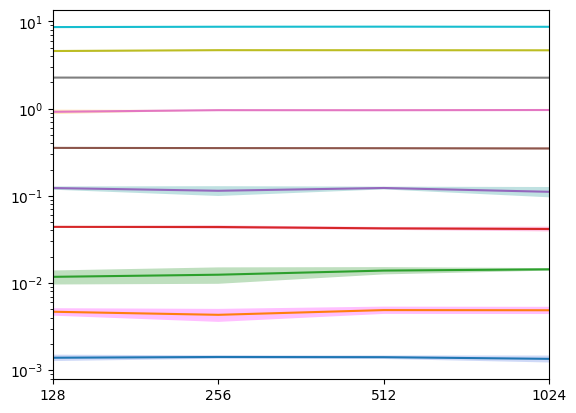

In [20]:
fig, ax = plt.subplots()
cs = ['royalblue', 'magenta', 'green', 'deeppink', 'darkcyan', 'indianred', 'orange', 'fuchsia', 'indigo', 'deepskyblue']
for i in range(10):
    ax.plot(np.arange(4), speedup[3,:,i], label=f"n={ns[i]}")
    ax.fill_between(np.arange(4),
                    speedup[3,:,i]+speedup_err[3,:,i],
                    speedup[3,:,i]-speedup_err[3,:,i],
                    color=cs[i], edgecolor=None, alpha=0.25)
ax.set_xticks(np.arange(4))
ax.set_xlim(0,3)
ax.set_xticklabels(["128", "256", "512", "1024"])
ax.set_yscale("log")

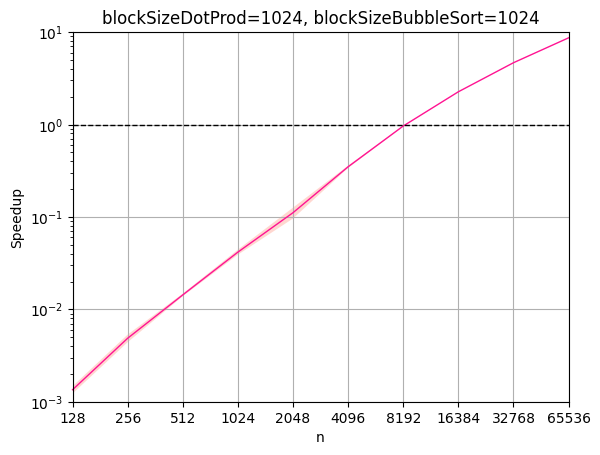

In [26]:
fig, ax = plt.subplots()

for i in range(3,4):
    ax.plot(np.arange(10), speedup[-1, i,:], linewidth=1, clip_on=False, 
             color=cs[i], label=f'blockSizeDotProd={blockSizeDotProds[i]}')
    ax.fill_between(np.arange(10),
                    speedup[-1, i, :]+speedup_err[-1, i,:],
                    speedup[-1, i, :]-speedup_err[-1, i,:],
                    color="tomato", edgecolor=None, alpha=0.25)
ax.set_xticks(np.arange(10))
ax.set_yscale("log")
ax.set_xticklabels(["128", "256", "512", "1024", "2048", "4096", "8192", "16384", "32768", "65536"])
ax.axhline(y=1,linestyle='--',color='black',linewidth=1)

ax.set_xlim(0,9)
ax.set_ylim(1e-3,10)
ax.grid()

# ax.legend()

ax.set_xlabel('n')
ax.set_ylabel('Speedup')

ax.set_title(f"blockSizeDotProd={blockSizeDotProds[-1]}, blockSizeBubbleSort={blockSizeBubbleSorts[-1]}")

fig.savefig("../fig/speedup.pdf")

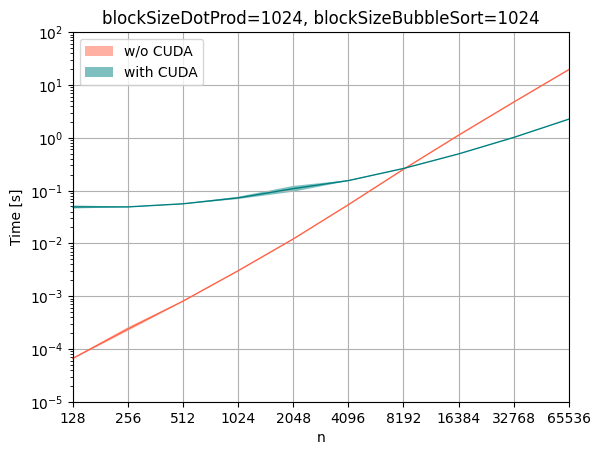

In [35]:
fig, ax = plt.subplots()

ax.plot(np.arange(10), cpu_data.mean(axis=0), linewidth=1, clip_on=False, 
             color="tomato")
ax.fill_between(np.arange(10),
                cpu_data.mean(axis=0)+cpu_data.std(axis=0),
                cpu_data.mean(axis=0)-cpu_data.std(axis=0),
                color="tomato", edgecolor=None, alpha=0.5, label="w/o CUDA")

ax.plot(np.arange(10), cuda_data[:,-1,-1,:].mean(axis=0), linewidth=1, clip_on=False, 
             color="teal")
ax.fill_between(np.arange(10),
                cuda_data[:,-1,-1,:].mean(axis=0)+cuda_data[:,-1,-1,:].std(axis=0),
                cuda_data[:,-1,-1,:].mean(axis=0)-cuda_data[:,-1,-1,:].std(axis=0),
                color="teal", edgecolor=None, alpha=0.5, label="with CUDA")

ax.set_xticks(np.arange(10))
ax.set_yscale("log")
ax.set_xticklabels(["128", "256", "512", "1024", "2048", "4096", "8192", "16384", "32768", "65536"])

ax.set_xlim(0,9)
ax.set_ylim(1e-5,1e2)
ax.grid()

ax.legend()

ax.set_xlabel('n')
ax.set_ylabel('Time [s]')

ax.set_title(f"blockSizeDotProd={blockSizeDotProds[-1]}, blockSizeBubbleSort={blockSizeBubbleSorts[-1]}")

fig.savefig("../fig/time.pdf")

In [7]:
import pandas as pd

In [21]:
cpu_d = {"n" : ns, "Experiment 1, time [s]" : cpu_data[0],
         "Experiment 2, time [s]" : cpu_data[1],
         "Experiment 3, time [s]" : cpu_data[2]}
cpu_df = pd.DataFrame(data=cpu_d)

In [28]:
cpu_df.to_latex(index=False, escape=False)

/tmp/ipykernel_14952/2222410193.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  cpu_df.to_latex(index=False, escape=False)


'\\begin{tabular}{rrrr}\n\\toprule\n    n &  Experiment 1, time [s] &  Experiment 2, time [s] &  Experiment 3, time [s] \\\\\n\\midrule\n  128 &                0.000068 &                0.000064 &                0.000066 \\\\\n  256 &                0.000232 &                0.000264 &                0.000219 \\\\\n  512 &                0.000818 &                0.000811 &                0.000782 \\\\\n 1024 &                0.003057 &                0.003034 &                0.002976 \\\\\n 2048 &                0.012218 &                0.011936 &                0.012054 \\\\\n 4096 &                0.054522 &                0.053183 &                0.053714 \\\\\n 8192 &                0.251769 &                0.252911 &                0.251337 \\\\\n16384 &                1.114888 &                1.116227 &                1.116454 \\\\\n32768 &                4.715581 &                4.716613 &                4.729591 \\\\\n65536 &               19.502211 &               19.46

In [29]:
cuda_d = {"n" : ns, "Experiment 1, time [s]" : cuda_data[0,-1,-1],
         "Experiment 2, time [s]" : cuda_data[1,-1,-1],
         "Experiment 3, time [s]" : cuda_data[2,-1,-1]}
cuda_df = pd.DataFrame(data=cuda_d)
cuda_df.to_latex(index=False, escape=False)

/tmp/ipykernel_14952/951851438.py:5: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  cuda_df.to_latex(index=False, escape=False)


'\\begin{tabular}{rrrr}\n\\toprule\n    n &  Experiment 1, time [s] &  Experiment 2, time [s] &  Experiment 3, time [s] \\\\\n\\midrule\n  128 &                0.053186 &                0.045283 &                0.048316 \\\\\n  256 &                0.049865 &                0.047979 &                0.049021 \\\\\n  512 &                0.057104 &                0.055553 &                0.055503 \\\\\n 1024 &                0.069109 &                0.077740 &                0.070962 \\\\\n 2048 &                0.100900 &                0.097171 &                0.127741 \\\\\n 4096 &                0.158140 &                0.152292 &                0.152014 \\\\\n 8192 &                0.262026 &                0.259266 &                0.263291 \\\\\n16384 &                0.493997 &                0.493384 &                0.492549 \\\\\n32768 &                1.006057 &                1.016413 &                1.013941 \\\\\n65536 &                2.242325 &                2.24